In [16]:
using FFTW
using Plots
Plots.theme(:juno)
plotly();

# Die n-dimensionale Fourier-Transformation

Wir kennen schon die Fourier-Transformation für eine unabängige Variable, so haben wir es:

Sei $f\in\mathbb{R}$ eine integrierbare Funktion. Die (kontinuerliche) Fourier-Transformierte $\mathcal{F}\{f(t)\}$ ist definiert durch
\begin{equation}
\mathcal{F}\{f(t)\}=g(\omega)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}f(t)e^{-i\omega t}dt
\end{equation}
und die zugehörige inverse Transformation lautet:
\begin{equation}
\mathcal{F}^{-1}\{g(\omega)\}=f(t)=\frac{1}{\sqrt{2\pi}}\int_{-\infty}^{\infty}g(\omega)e^{i\omega t}d\omega
\end{equation}
Aber auch ist es möglich, diese mathematische Ausdrücke für funktionen $f\in\mathbb{R}_n$ schreiben. Also:
\begin{equation}
\mathcal{F}\{f(t)\}=g(\omega)=\frac{1}{\sqrt{2\pi}^n}\int_{\mathbb{R}_n}f(t)e^{-i\omega\cdot t}dt
\end{equation}
\begin{equation}
\mathcal{F}^{-1}\{g(\omega)\}=f(t)=\frac{1}{\sqrt{2\pi}^n}\int_{\mathbb{R}_n}g(\omega)e^{i\omega\cdot t}d\omega
\end{equation}
Dabei gilt: $dt$ und $d\omega$ wären $n$-dimensionale Volumenelemente und "$\omega\cdot t$" das Standardskalarprodukt der Vektoren $t$ und $\omega$.

# Sonderfall: 2D Fourier-Transformationen

In 1 Dimension benutzen wir normalerweise $t$ für Zeit- und $\omega$ für Frequenzraum. In 2 Dimensionen Fourier-Transformationen (2DFT) ist es einfacher, auf räumlicher Dimensionen zu denken. Das heißt, $t=x\hat{i}+y\hat{j}$. Für $g$ benutzen wir $(u,v)$, die vertikale und horizontale räumliche Frequenzen. Das heißt, $\omega=u\hat{i}+v\hat{j}$. Da wäre $\omega\cdot t=ux+vy$ und infolgedessen werden die funktionen so geschrieben: $f(t)=f(x,y)$ und $g(\omega)=g(u,v)$, beziehungsweise $dt=dxdy$ und $d\omega=dudv$. Die Ausdrücke für 2 Dimensionen wären
\begin{equation}
\mathcal{F}\{f(x,y)\}=g(u,v)=\frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}f(x,y)e^{-i(ux+vy)}dxdy
\end{equation}
\begin{equation}
\mathcal{F}^{-1}\{g(u,v)\}=f(x,y)=\frac{1}{2\pi}\int_{-\infty}^{\infty}\int_{-\infty}^{\infty}g(u,v)e^{i(ux+vy)}dudv
\end{equation}
Manche Authoren schreiben es anders:
\begin{equation}
\mathcal{F}\{f(x,y)\}=g(f_X,f_Y)=\iint_{-\infty}^{\infty}f(x,y)e^{-2\pi i(f_Xx+f_Yy)}dxdy
\end{equation}
Das kann folgendes erklären werden. Am Anfang war es mit $\xi$, oder $f$, statt $\omega$, und $\omega=2\pi\xi=2\pi f$. $\omega$ ist die Kreisfrequenz und $\xi$ oder $f$ sind nur Frequenzen. In letzter Beispiel ist es einfach zu sehen, weil die räumliche frequenzen sind $f_X$ und $f_Y$, statt $\omega_X$ und $\omega_Y$. Deshalb sind sie anders, aber beide sind gültig.

Die funktion $f(x,y)$ muss einige Bedingungen erfüllen, damit das wahr ist:
1. $f(x,y)$ muss absolut integrierbar sein, d.h. $\displaystyle\iint_{R^2}\vert f(x,y)\vert dxdy$ muss endlich sein
2. $f(x,y)$ muss nur ein endliche Anzahl von Diskontinuitäten und Extremwerte haben
3. $f(x,y)$ muss keine Polstelle haben

# Eigenschaften der 2DFT

Sei $\displaystyle\mathcal{F}\{g(x,y)\}=G(u,v)$ und $\displaystyle\mathcal{F}\{h(x,y)\}=H(u,v)$:

- ### Delta-Distribution - $\displaystyle\mathcal{F}\{\delta(x,y)\}=1$
- ### Linearitätssatz - $\displaystyle\mathcal{F}\{\alpha g+\beta h\} = \alpha\mathcal{F}\{g\}+\beta\mathcal\{h\}$
- ### Ähnlichkeitssatz - $\displaystyle\mathcal{F}\{g(\alpha x,\beta y)\}=\frac{1}{\vert\alpha\beta\vert }G\left(\frac{u}{\alpha},\frac{v}{\beta}\right)$  
Das ist sehr wichtig und die Grundlage der Unschärferelation. Es bedeutet, dass wann immer wir die Koordinaten des räumliches Dimensions verlängern, werden die Frequenzen sich verkürzen.
- ### Verschiebungssatz - $\displaystyle\mathcal{F}\{g(x-x_0,y-y_0)\}=G(u,v)\cdot e^{-i(ux_0+vy_0)}$
- ### Satz von Parseval - $\displaystyle\iint_{\mathbb{R}^2}\vert g(x,y)\vert^2dxdy=\displaystyle\iint_{\mathbb{R}^2}\vert G(u,v)\vert^2dudv$
- ### Faltungssatz - $\displaystyle\mathcal{F}\left\{\iint_{\mathbb{R}^2} g(\alpha,\beta)h(x-\alpha,y-\beta)d\alpha d\beta\right\}=G(u,v)H(u,v)$
- ### Autokorrelationssatz - $\displaystyle\mathcal{F}\left\{\iint_{\mathbb{R}^2} g(\alpha,\beta)g^*(\alpha-x,\beta-y)d\alpha d\beta\right\}=\vert G(u,v)\vert^2$  
### Beziehungsweise: $\displaystyle\mathcal{F}\left\{\vert g(x,z)\vert^2\right\}=\iint_{\mathbb{R}^2}G(\alpha,\beta)G^*(\alpha-u,\beta-v)d\alpha d\beta$
- ### Fourierischer Integralsatz - $\displaystyle\mathcal{F}\left\{\mathcal{F}^{-1}\{g(x,y)\}\right\}=\mathcal{F}^{-1}\left\{\mathcal{F}\{g(x,y)\}\right\}=g(x,y)$

# Separationsätze

Ein Separationsatz ist eine Funktion, die mehreren Variablen hat ($n$-Variablen) und dass als Produkt von $n$ einzelne Variable Funktionen, die jede von diese $n$ variable haben. Das heißt:
\begin{equation}
g(x,y)=X(x)Y(y)
\end{equation}
Diese Funktion wäre ein Separationsatz durch das Kartesisches Koordinatensystem. Es wäre auch möglich, dass die Funktion durch andere Koordinatensysteme auch eine Separationsatz ist, zB durch Polarkoodrinaten:
\begin{equation}
g(r,\theta)=R(r)\Theta(\theta)
\end{equation}
Für uns werden diese Funktionen sehr nutzlich sein, das werden wir bald sehen. Sei $g(x,y)=X(x)Y(y)$:
$$\mathcal{F}\{g(x,y)\}=\frac{1}{2\pi}\iint_{\mathbb{R}^2}g(x,y)e^{-i(ux+vy)}dxdy$$
$$\Rightarrow\mathcal{F}\{g(x,y)\}=\frac{1}{2\pi}\iint_{\mathbb{R}^2}X(x)Y(y)e^{-iux}e^{ivy}dxdy$$
$$\Rightarrow\mathcal{F}\{g(x,y)\}=\frac{1}{2\pi}\iint_{\mathbb{R}^2}\left[X(x)e^{-iux}dx\right]\left[Y(y)e^{ivy}dy\right]$$
$$\Rightarrow\mathcal{F}\{g(x,y)\}=\frac{1}{2\pi}\int_{-\infty}^{\infty}X(x)e^{-iux}dx
\int_{-\infty}^{\infty}Y(y)e^{ivy}dy$$
$$\therefore\mathcal{F}\{g(x,y)\}=\mathcal{F}_x\{X(x)\}\mathcal{F}_y\{Y(y)\}$$
Und so ist auch die Transformation der Funktion ein Separationsatz.

# Polarkoordinaten

Manchmal werden wir Kreissymmetrie haben, sodass es einfach ist, mit Polarkoordinaten, statt mit kartesischen Koordinaten, zu arbeiten. Das ist aber leider mit unsere Ausdrücke nicht möglich. Wir brauchen neue Begriffe, und zwar sofort. Aber zuerst, was bedeutet Kreissymmetrie? Wenn wir ein funktion in Polarkoordinaten haben, lass uns sagen $g(r,\theta)$, dass unäbhangig von $\theta$ ist, d.h. $g(r,\theta)=g(r)$, dann haben wie Kreissymmetrie. In viele optische Systeme ist das der Fall, deswegen ist es wichtig, in diese Koordinaten die Fourier-Transformation zu begriffen. Wir benutzen die folgende Transformationen zur Polarkoordinaten:
\begin{align*}
r=\sqrt{x^2+y^2}\quad&\quad x=r\cos\theta\\
\theta=\arctan\frac{y}{x}\quad&\quad y=r\sin\theta\\
\rho=\sqrt{u^2+v^2}\quad&\quad u=\rho\cos\phi\\
\phi=\arctan\frac{v}{u}\quad&\quad v=\rho\sin\phi\\
dxdy=rdrd\theta\quad&\quad dudv=\rho d\rho d\phi
\end{align*}
Dann haben wir $g(x,y)=h(r)$ (wir nehmen eine Kreissymmetrie an) und $G(u,v)=H(\rho,\phi)$. Wir werden bald sehen, dass $H$ auch Kreissymmetrie hat, aber jetzt können wir es noch nicht wissen. Wir dann haben die Fourier-Transformation in folgendes Form:
$$H(\rho,\phi)=\frac{1}{2\pi}\int_0^{2\pi}\int_0^\infty h(r)e^{-i[(\rho\cos\phi)(r\cos\theta)+(\rho\sin\phi)(r\sin\theta)]}(rdrd\theta)$$
$$H(\rho,\phi)=\frac{1}{2\pi}\int_0^\infty rh(r)dr\int_0^{2\pi}e^{-ir\rho(\cos\phi\cos\theta+\sin\phi\sin\theta)}d\theta$$
Wir erinnern uns an die trigonometrische Identität:
$$\cos(s-t)=\cos s\cos t+\sin s\sin t$$
Und wir benutzen sie, um den letzten Satz zu vereinfachen:
$$H(\rho,\phi)=\frac{1}{2\pi}\int_0^\infty rh(r)dr\int_0^{2\pi}e^{-ir\rho\cos(\theta-\phi)}d\theta$$
Und hier, pause. Es ist an der Zeit, dass wir über die Bessel-Funktionen reden.

## Bessel-Funktionen

Die Besselsche Differentialgleichung ist eine gewöhnliche lineare Differentialgleichung zweiter Ordnung, die durch
$$x^2\frac{d^2}{dx^2}y+x\frac{d}{dx}y+(x^2-\alpha^2)y=0$$
definiert ist. Wobei $x$ und $\alpha$ reele oder komplexe Zahlen sind. Die Lösungen heißen Bessel-Funktionen $\alpha$-ter Ordnung. Wir können auch die Bessel-Operator definieren:
$$B_\alpha:=x^2\frac{d^2}{dx^2}+x\frac{d}{dx}+(x^2-\alpha^2)$$
So würde die Besselsche Differentialgleichung einfach nur $B_\alpha y=0$ sein. Hier werden wir nur die Bessel-Funktionen erster Gattung benutzen. So definieren wir sie:
$$J_\alpha(x)=\sum_{m=0}^\infty\frac{\displaystyle(-1)^m\left(\frac{x}{2}\right)^{2m+\alpha}}{\Gamma(\alpha+m+1)r!}$$
Aber was passiert, wenn $\alpha\in\mathbb{Z}$? Wir müssen es überlegen, dass $m$ auch eine ganze Zahl ist. Das heißt, die Gamma-Funktion wäre einfach nur ein Faktorial:
$$J_\alpha(x)=\sum_{m=0}^\infty\frac{\displaystyle(-1)^m\left(\frac{x}{2}\right)^{2m+\alpha}}{(\alpha+m+1)!r!}$$
Es ist vielleicht schwierig zu glauben, aber diese Ausdrücke hat eine Integraldarstellung:
$$J_\alpha=\frac{1}{2\pi}\int_{-\pi}^\pi e^{i(x\sin\theta-\alpha\theta)}d\theta$$
Und auch haben wir: $\cos(x)=\displaystyle\sin\left(\frac{\pi}{2}\right)$ So können wir eine neue Variabel $u$, sodass $\theta=u+\displaystyle\frac{\pi}{2},d\theta=du$. Die Grenze würden sich auch normalerweise verändert, aber da $\cos$ eine periodische Funktion ist, mit Periode $2\pi$, würde es egal sein. In der tat, wir könnten die Grenzen für $a$ und $a+2\pi$ verändern und die Ergebnisse würden nicht verändert:
$$J_\alpha=\frac{1}{2\pi}\int_{0}^{2\pi} e^{i[x\sin(u+\pi/2)-\alpha(u+\pi/2)]}du=\frac{1}{2\pi}\int_{-\pi}^\pi e^{i[x\cos u-\alpha(u+\pi/2)]}du$$
Mit $\alpha=0$ haben wir:
$$J_0=\frac{1}{2\pi}\int_{0}^{2\pi}e^{ix\cos u}du$$
Wir können wieder $\theta$ benutzen, und auch eine Phasenwinkel $\phi$ hinzufügen:
$$J_0=\frac{1}{2\pi}\int_{0}^{2\pi}e^{ix\cos(\theta-\phi)}d\theta$$
Kommt sie jetzt bekannt vor?

## Hankel-Transformationen

Wir können diese letzte Darstellung benutzen, um unsere Ausdruck daoben zu vereinfachen:
$$H(\rho,\phi)=\frac{1}{2\pi}\int_0^\infty rh(r)dr\int_0^{2\pi}e^{-ir\rho\cos(\theta-\phi)}d\theta=\int_0^\infty rh(r)J_0(r\rho)dr$$
Offentsichtlich hängt $H$ von $\phi$ nicht ab, also:
$$H(\rho)=\int_0^\infty rh(r)J_0(r\rho)dr$$
Wenn $h$ eine Kreissymmetrie hat, wird $H$ es auch haben. Das ist aber wunderbar. Diese besondere Fall der Fourier-Transformationen geschieht so oft, dass es eine besondere Name kriegt: Hankel-Transformation nuller Ordnung, $\mathcal{H}_0$. Nun können wir auch finden, wie die inverse Transformation lautet:
$$h(r)=\frac{1}{2\pi}\int_{0}^{2\pi}\int_{0}^{\infty}\rho H(\rho)e^{-ir\rho\cos(\theta-\phi)}d\rho d\theta$$
Vereinfacht:
$$h(r)=\int_{0}^{\infty}\rho H(\rho)J_0(r\rho)d\rho$$

# Besondere Funktionen

Es gibt ein paar besondere Funktionen, die man so oft in Bereich benutzt, sodass sie alle eine eigene Name bekommen haben. Sehen wir es folgendes:

## Rechtecksfunktion $$rect(x)=\begin{cases}1&\vert x\vert<\displaystyle \frac{1}{2}\\\displaystyle\frac{1}{2}&\vert x\vert =\displaystyle \frac{1}{2}\\0&\text{otherwise}\end{cases}$$

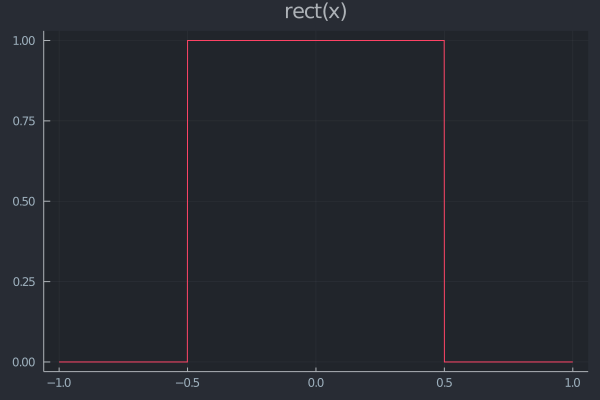

In [64]:
# Heaviside Function
H(x) = 0.5 * (sign(x)+1)
# Triangle Function
rect(x) = H(x+0.5) * H(-(x-0.5))
plot(rect)
plot(rect,-1,1,title = "rect(x)",label ="")

## Spaltfunktion $$sinc(x)=\frac{\sin(\pi x)}{\pi x}$$

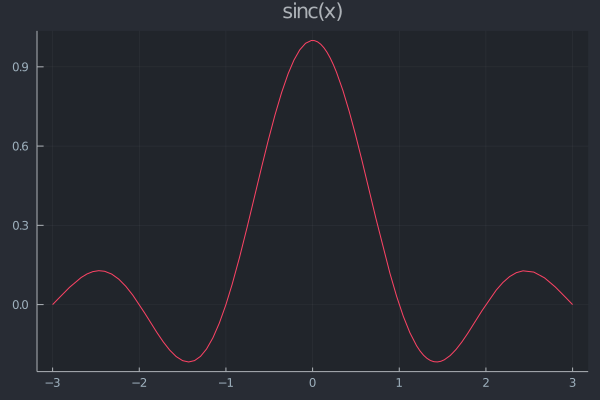

In [65]:
plot(sinc,-3,3,title="sinc(x)",label = "")

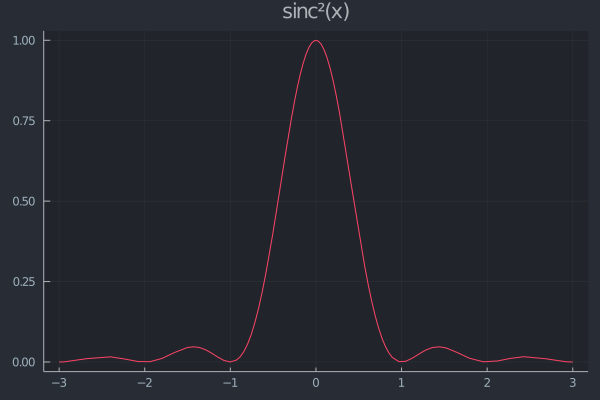

In [66]:
sinc²(x) = (sinc(x))^2
plot((sinc²),-3,3,title="sinc²(x)",label = "")

## Vorzeichenfunktion  $$sgn(x)=\begin{cases}1& x>0\\0&x=0\\-1&0>x\end{cases}$$

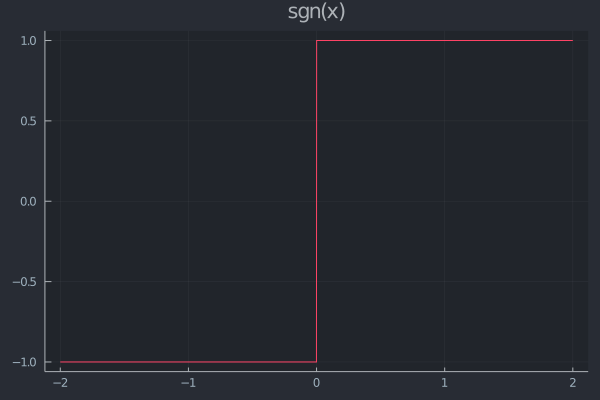

In [67]:
sgn(x) = sign(x)
plot(sgn,-2,2,title = "sgn(x)",label = "")

## Dreiecksfunktion $$\Lambda(x)=\begin{cases}1-\vert x\vert&\vert x\vert\leq1\\0&\text{otherwise}\end{cases}$$

In [1]:
# Heaviside Function
H(x) = 0.5 * (sign(x)+1)
# Triangle Function
Λ(x) = H(x+1) * H(-(x-1)) * (1-abs(x))
plot(Λ,title = "Λ(x)",-1.5,1.5,label = "")

LoadError: UndefVarError: plot not defined

## Dirac-Kamm $$comb(x)=\sum_{n=-\infty}^\infty\delta(x-n)$$

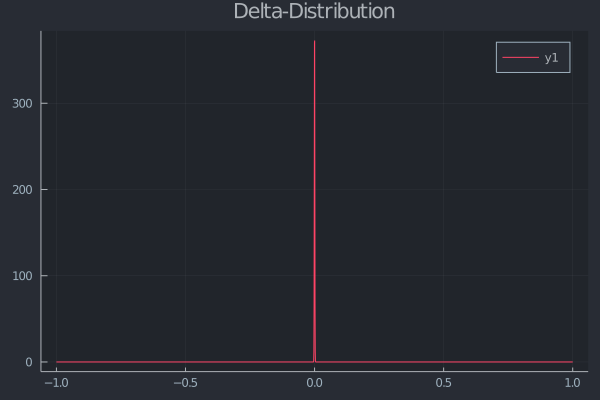

In [78]:
delta(x) = 1/((1e-3)*√(2π))*exp(-1/2*(x/(1e-3))^2)
plot(delta,-1,1,title="Delta-Distribution")

In [19]:
T = 1
function comb(x)
    if floor(x/T)==round(x/T,digits=1)
        delta(0)
    else
        0
    end
end
plot(comb,-5,5,title="comb(x)")

<!DOCTYPE html>
 
 
 Plots.jl

In [21]:
# Number of points 
N = 2^14 - 1 
# Sample period
Ts = 1 / (1.1 * N) 
# Start time 
t0 = 0 
tmax = t0 + N * Ts
# time coordinate
t = t0:Ts:tmax

# signal 
signal = sin.(2π * 60 .* t) # sin (2π f t) 

# Fourier Transform of it 
F = fft(signal) |> fftshift
freqs = fftfreq(length(t), 1.0/Ts) |> fftshift

# plots 
time_domain = plot(t, signal, title = "Signal")
freq_domain = plot(freqs, abs.(F), title = "Spectrum", xlim=(-1000, +1000))
plot(time_domain, freq_domain, layout = 2)

<!DOCTYPE html>
 
 
 Plots.jl

# Ortsfrequenz

Kompleze Zahlen können wir als folgendes darstellen
$$z = a+bi = |z|e^{i\phi}$$
Wobei $a,b\in\mathbb{R}$, $\phi\in[0,2\pi)$, $|z|=\sqrt{a^2+b^2}$ ist der Betrag von $z$ und $\phi$ nennen wir die Phase. Man könnte $z$ als eine Funktion mit zwei Argumente $z=z(a,b)$ sehen. Nun definieren wir eine Komplexe Funktion. Wir könnten $|z|$ und $\phi$ als Funktionen mit zwei Argumente $x$ und $y$:
$$g(x,y)=a(x,y)e^{i\phi(x,y)}$$


In [2]:
using SymPy
# im for √(-1)
x,y,u,v = symbols("x,y,u,v",real=true)
simplify((1/2*PI)*integrate(exp(-PI*(x^2+y^2))*exp(im*(u*x+v*y)),(x,-Inf,Inf),(y,-Inf,Inf)))

         / 2    2\ 
        -\u  + v / 
        -----------
            4*pi   
0.5*pi*e           

In [ ]:
simplify((1/2*PI)*integrate(sinc(x)*sinc(y)*exp(im*(u*x+v*y)),(x,-Inf,Inf),(y,-Inf,Inf)))